In [1]:
from basicpy import BaSiC
import numpy as np

import zarr
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# path = '/u/home/f/f7xiesnm/project-zipursky/data/hold/lt172/r1_export.n5'
path = "/u/scratch/f/f7xiesnm/lt172_gene_r1/dataset.n5"

zarr_data = zarr.open(store=zarr.N5Store(path), mode='r')
images = zarr_data[f'setup0/timepoint0/s3'][...]
images2 = zarr_data[f'setup4/timepoint0/s3'][...]

images.shape, images2.shape

((371, 240, 240), (371, 240, 240))

In [19]:
np.min(images), np.min(images2)

(87, 87)

In [3]:
# images    = images.astype(np.float16) # then save back as uint16
# images_s3 = images_s3.astype(np.float16)

# images    = np.clip(images   -90, 0, None)
# images_s3 = np.clip(images_s3-90, 0, None)

<Axes: ylabel='Count'>

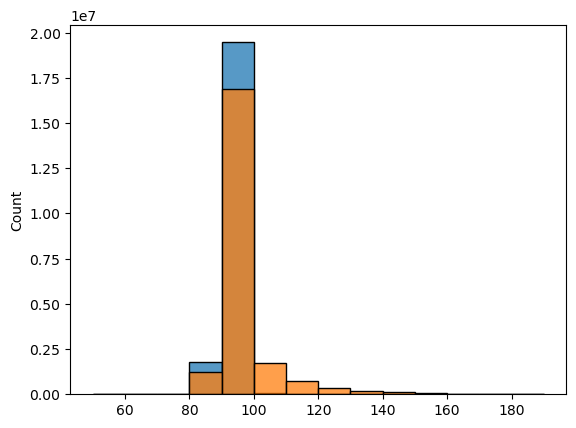

In [4]:
sns.histplot(np.ravel(images), bins=np.arange(50, 200, 10))
sns.histplot(np.ravel(images2), bins=np.arange(50, 200, 10))

In [5]:
%%time
basic = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic.fit(images)
images_transformed = (images - basic.darkfield[np.newaxis])/ basic.flatfield[np.newaxis]

CPU times: user 56 s, sys: 20.3 s, total: 1min 16s
Wall time: 20 s


In [14]:
np.max(basic.darkfield)
np.min(basic.darkfield)

0.0

In [6]:
%%time
basic2 = BaSiC(get_darkfield=True, smoothness_flatfield=1)
basic2.fit(images2)
images_transformed2 = (images2 - basic2.darkfield[np.newaxis])/ basic2.flatfield[np.newaxis]

CPU times: user 50.7 s, sys: 24.7 s, total: 1min 15s
Wall time: 16.8 s


In [17]:
np.max(basic2.darkfield)
np.min(basic2.darkfield)

0.0

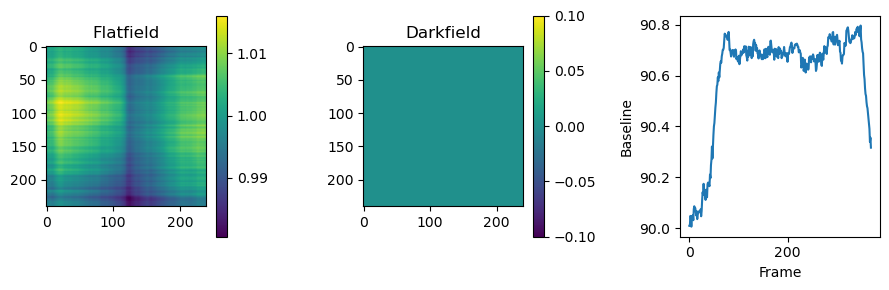

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

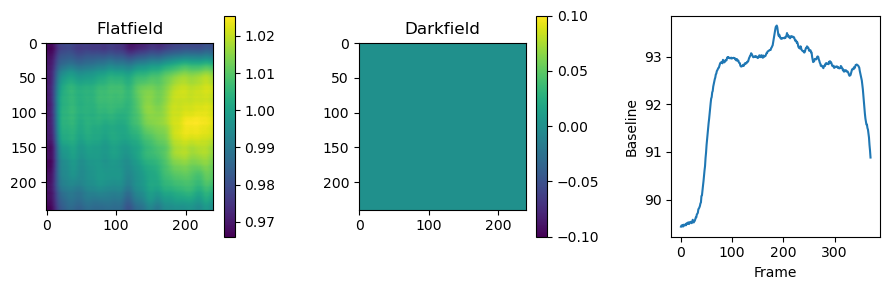

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
im = axes[0].imshow(basic2.flatfield)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Flatfield")
im = axes[1].imshow(basic2.darkfield)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Darkfield")
axes[2].plot(basic2.baseline)
axes[2].set_xlabel("Frame")
axes[2].set_ylabel("Baseline")
fig.tight_layout()

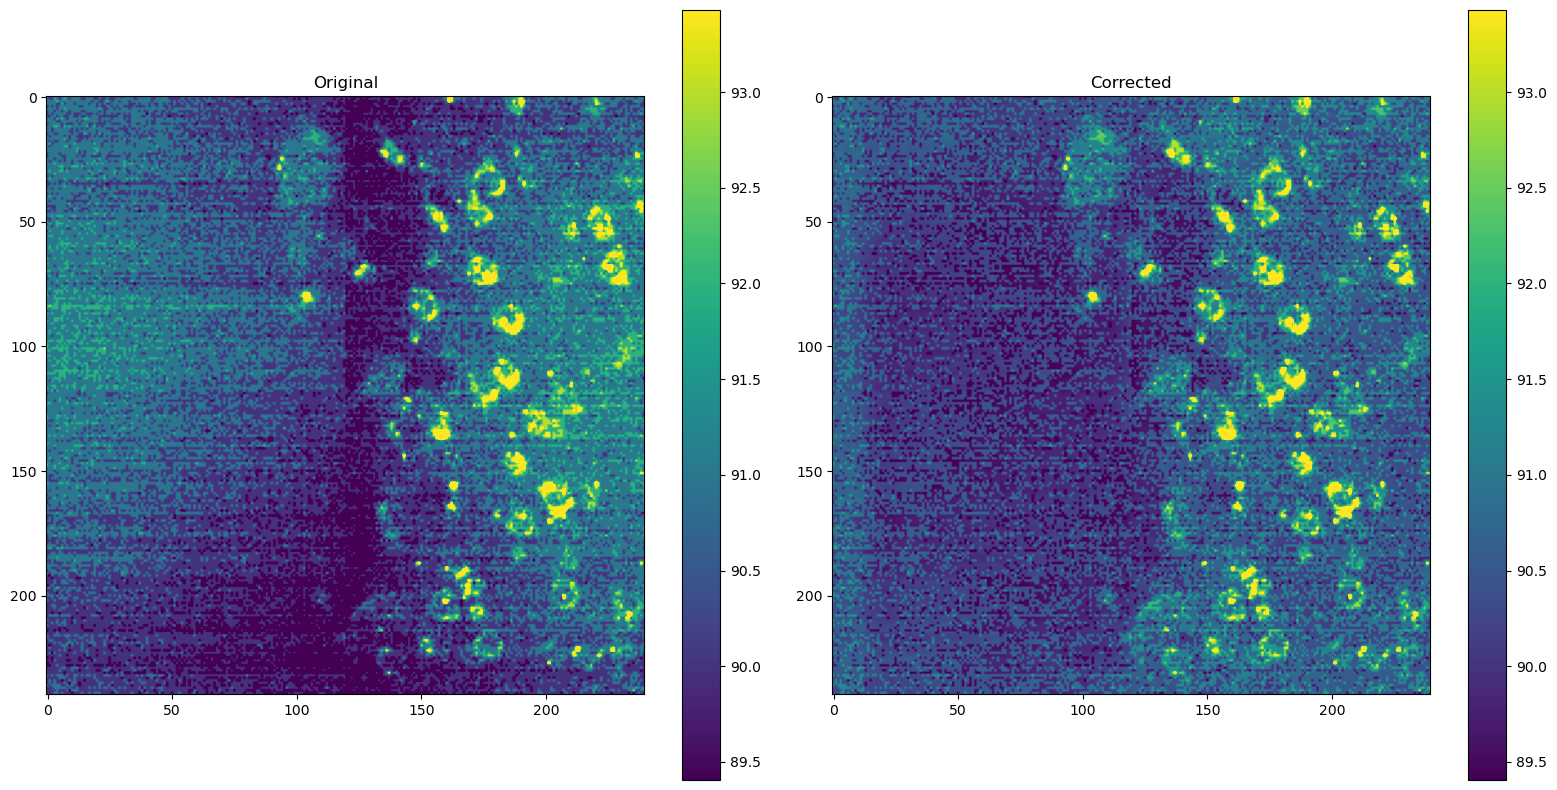

In [15]:
i = 50
vmin = np.percentile(images_transformed[i], 5)
vmax = np.percentile(images_transformed[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()

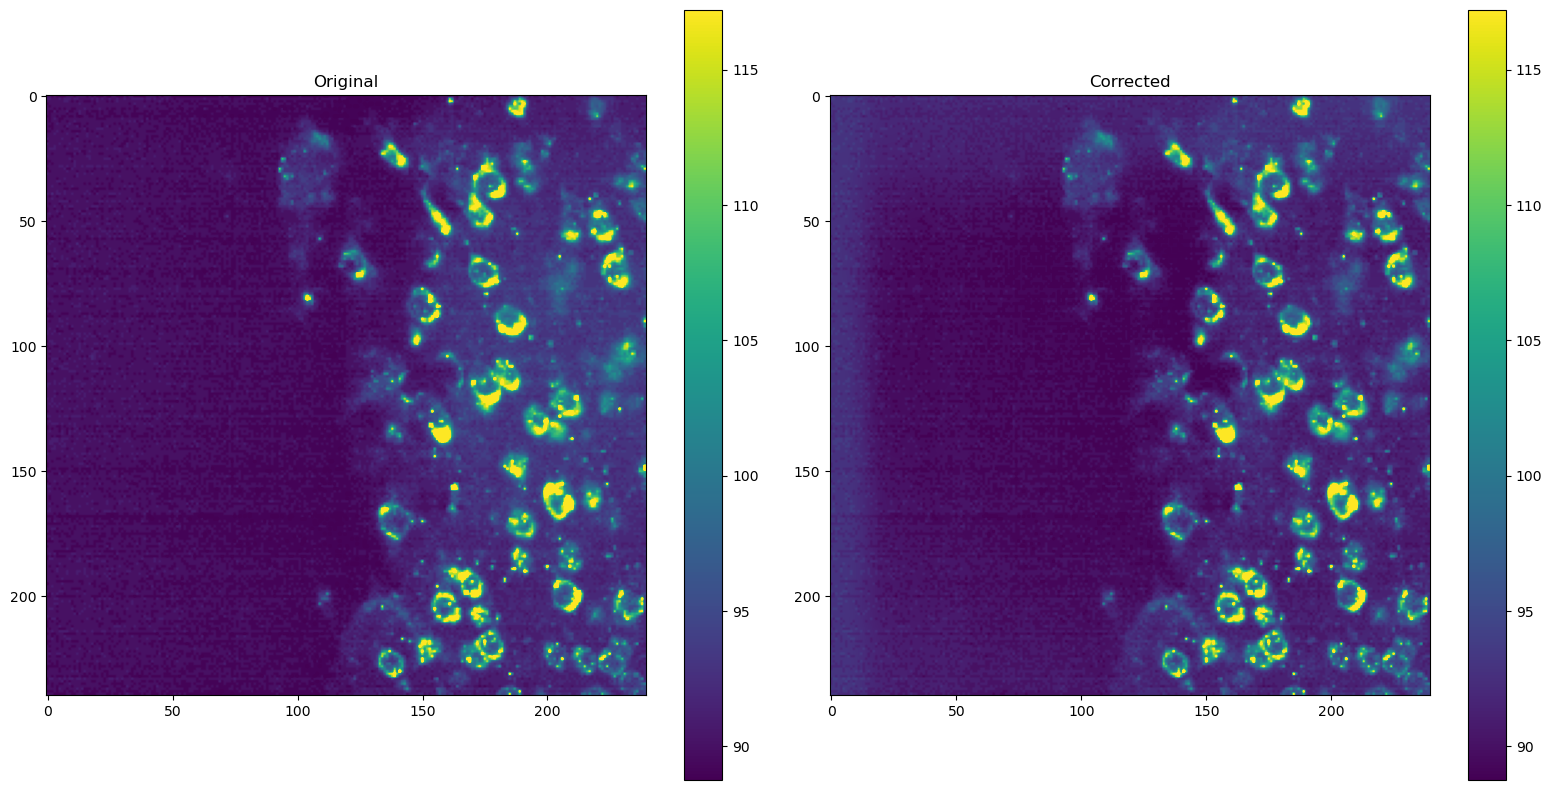

In [16]:
i = 50
vmin = np.percentile(images_transformed2[i], 5)
vmax = np.percentile(images_transformed2[i], 99)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
im = axes[0].imshow(images2[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[0])
axes[0].set_title("Original")
im = axes[1].imshow(images_transformed2[i], vmin=vmin, vmax=vmax)
fig.colorbar(im, ax=axes[1])
axes[1].set_title("Corrected")
fig.tight_layout()